<a href="https://colab.research.google.com/github/vijjus/ST-summer-2024/blob/main/SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curve Fitting

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Creating a function to model and create data
def func(x, a, b):
    return a * x + b

In [5]:
# Generating clean data
x = np.linspace(0, 10, 100)

In [6]:
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

In [7]:
# y = x + 2
y = func(x, 1, 2)

In [8]:
y[:10]

array([2.        , 2.1010101 , 2.2020202 , 2.3030303 , 2.4040404 ,
       2.50505051, 2.60606061, 2.70707071, 2.80808081, 2.90909091])

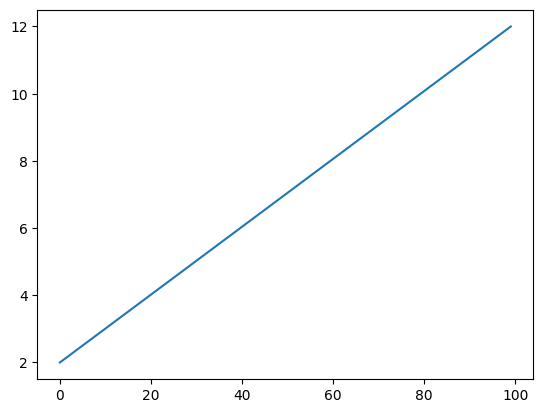

In [10]:
plt.plot(y)

In [11]:
# Adding noise to the data
yn = y + 0.9 * np.random.normal(size=len(x))

In [12]:
yn [:10]

array([2.5323836 , 2.86562903, 3.17330176, 2.66896918, 3.01225516,
       2.87485385, 3.62869714, 2.08178499, 4.05828625, 2.66404968])

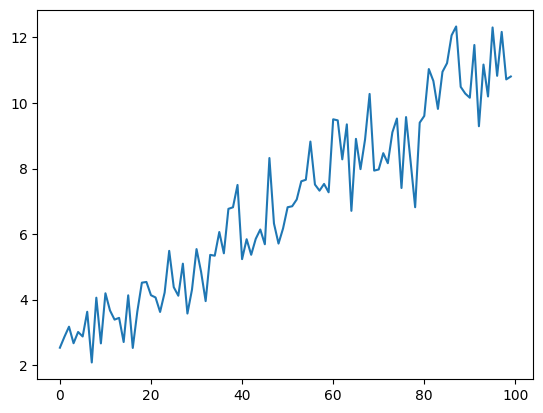

In [13]:
plt.plot(yn)

In [14]:
# Executing curve_fit on noisy data
# Note: func is the template we want to fit
# we don't know the coefficients at this point - just the data
popt, pcov = curve_fit(func, x, yn)

In [15]:
# popt returns the best fit values for parameters of
# the given model (func).
print(popt)

[0.91714642 2.33239705]


In [16]:
# the covariance matrix - variance of parameters a, b on the diagonal
print(pcov)

[[ 0.00088816 -0.00444078]
 [-0.00444078  0.02975473]]


# Covariance

Imagine you have two friends, Alice and Bob, and you're interested in how much their heights tend to change together. Maybe Alice is always taller than Bob, or maybe they both tend to grow at similar rates. Covariance is a statistical tool that helps you understand this relationship between two variables.

Here's how to think about it:

1. **Height Changes:**  Instead of focusing on their actual heights, let's look at how their heights **change** over time. Maybe Alice grows 2 inches this year, and Bob grows 1 inch. Or maybe they both shrink a little (due to rounding errors... or maybe they're gnomes!).

2. **Positive Covariance:** If Alice grows more than average (positive change) and Bob also grows more than average (positive change), that's a positive covariance. Their heights are changing in the **same direction**.

3. **Negative Covariance:** If Alice grows more than average (positive change) and Bob shrinks (negative change), that's a negative covariance. Their heights are changing in **opposite directions**.

4. **Zero Covariance:** Maybe their heights fluctuate randomly, with no connection between them. In this case, the covariance would be zero. There's no clear trend in how their heights change together.

**Covariance doesn't tell the whole story:**

* It just tells you the direction and **strength** (not necessarily the amount) of the relationship. A high positive covariance means their heights tend to change in the same direction, but it doesn't tell you exactly how much.
* Covariance is sensitive to units. If you measure height in centimeters instead of inches, the covariance value will change.

**Why is covariance useful?**

* It helps us see if two things are related, even if the relationship isn't perfectly linear.
* It's a building block for more advanced statistical tests.

**Real-life examples:**

* Studying hours spent studying and exam scores (positive covariance expected).
* Analyzing video game playtime and grades (negative covariance might be expected).

**Covariance is like a friendship meter for your data! It tells you how much two variables tend to "move together".**

# Gaussian Distribution

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left( -\frac{(x - {\mu})^2}{2\sigma^2} \right)$$


In [17]:
# Creating a function to model and create data
def func(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

In [18]:
# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)

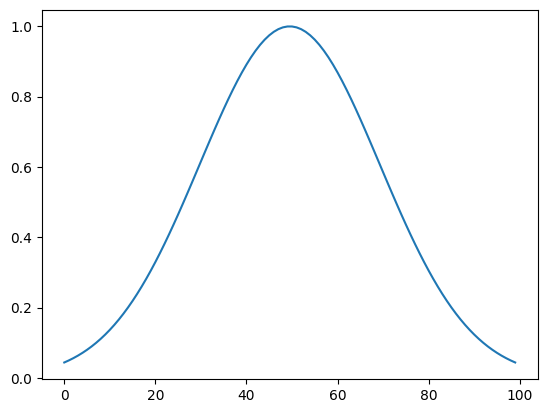

In [19]:
plt.plot(y)

In [20]:
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))

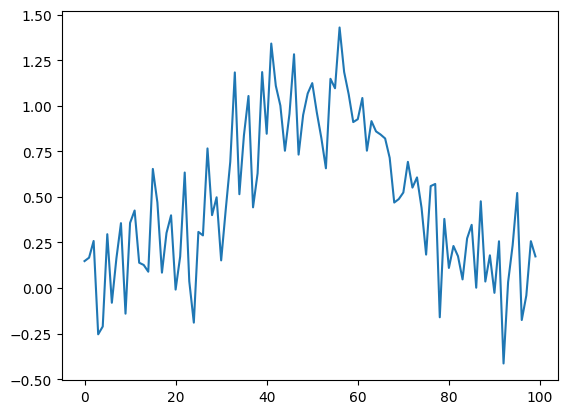

In [21]:
plt.plot(yn)

In [22]:
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

In [23]:
print(popt)

[1.06545592 5.09828111 1.82739186]


In [31]:
from scipy import linalg

In [32]:
arr = np.array([[1, 2], [3, 4]])

In [34]:
# calculating the determinant of a matrix
linalg.det(arr)

-2.0

Why is the determinant useful?

**Solving Systems of Equations**: Determinants are used to solve certain types of systems of equations with linear relationships. The value of the determinant tells you something about the solution:
A non-zero determinant indicates a unique solution exists.
A zero determinant might mean there are infinitely many solutions or no solution at all (depending on the specific system).

In [35]:
iarr = linalg.inv(arr)

In [36]:
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [37]:
np.allclose(np.dot(arr, iarr), np.eye(2))

True

In [38]:
np.dot(arr, iarr)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

# Inverse of Matrices

The inverse of a matrix is like a special mirror image that "undoes" the multiplication operation for a specific matrix. Imagine you have a magic trick where you multiply a number by a secret matrix and get a different number. The inverse is like finding another secret matrix that, when multiplied by the first secret matrix, gives you back the original number!

Here's a breakdown of the concept for high school students:

1. **Not all Matrices have Inverses:** Not every matrix has an inverse. It's like finding a perfect reflection – sometimes it doesn't exist. Square matrices (equal rows and columns) are the ones that can potentially have inverses.

2. **Cancellation Trick:** The key idea is that multiplying a matrix by its inverse (in the correct order) results in the identity matrix. The identity matrix is a special square matrix with 1s on the diagonal (top left to bottom right corner) and 0s everywhere else. It acts like a neutral element in multiplication, similar to 1 in regular multiplication. So, multiplying by the inverse "cancels out" the effect of the original matrix.

3. **Solving Equations:**  Inverses are particularly helpful for solving systems of linear equations. By manipulating the equations involving a matrix and its inverse, you can arrive at the solution for the variables.

4. **Thinking Visually (for 2x2 matrices):** Imagine a 2x2 matrix like a rectangle with arrows pointing in a certain direction. The inverse matrix would be like a mirrored version of the rectangle, with arrows pointing in the opposite direction (but proportionally scaled). Multiplying the original rectangle by its inverse would essentially "squish" it back into a square (the identity matrix).

**Here are some important points to remember:**

* Finding the inverse of a matrix can be computationally expensive, especially for larger matrices.
* Not having an inverse doesn't necessarily mean the matrix is useless. It just signifies there's no perfect "undoing" matrix in this case.


# Interpolation

In [46]:
measured_time = np.linspace(0, 1, 10)
measured_time

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [47]:
noise = (np.random.random(10)*2 - 1) * 1e-1
noise

array([ 0.06607505,  0.05229284, -0.00497055, -0.06703932, -0.00302452,
       -0.07749112, -0.01067025, -0.09393997,  0.05937641, -0.0809933 ])

In [48]:
measures = np.sin(2 * np.pi * measured_time) + noise
measures

array([ 0.06607505,  0.69508045,  0.9798372 ,  0.79898608,  0.33899562,
       -0.41951127, -0.87669565, -1.07874773, -0.5834112 , -0.0809933 ])

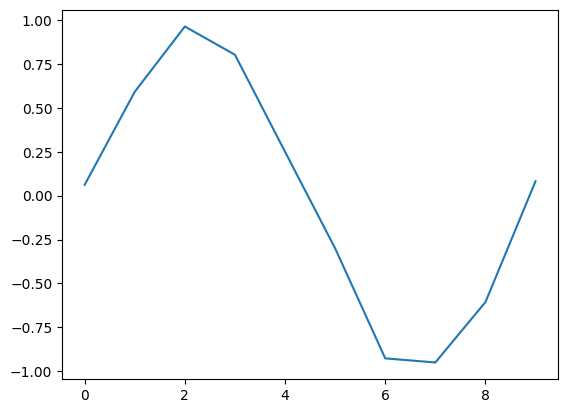

In [45]:
plt.plot(measures)

In [42]:
from scipy.interpolate import interp1d

In [43]:
# scipy.interpolate.interp1d can build a linear interpolation function:
linear_interp = interp1d(measured_time, measures)

In [44]:
linear_interp

In [49]:
interpolation_time = np.linspace(0, 1, 50)

In [50]:
linear_results = linear_interp(interpolation_time)

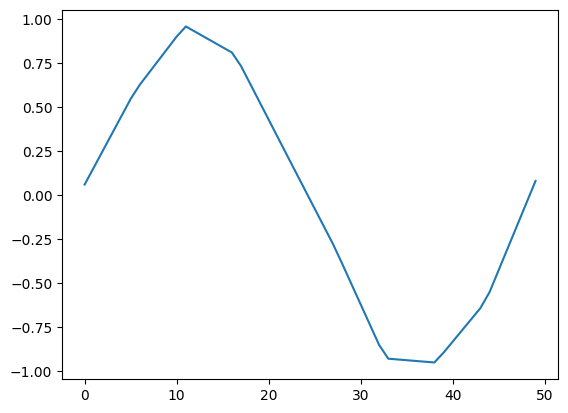

In [51]:
plt.plot(linear_results)

In [52]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')

In [53]:
cubic_results = cubic_interp(interpolation_time)

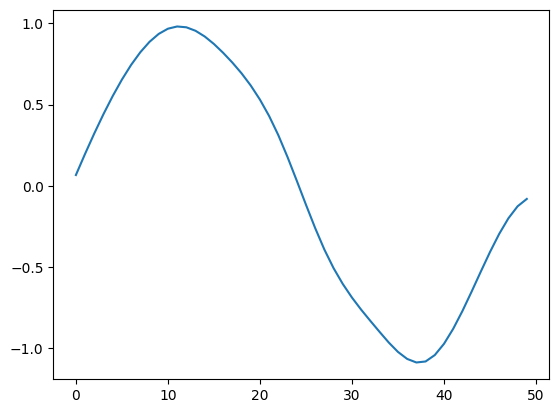

In [54]:
plt.plot(cubic_results)

# Exercise: Curve fitting of temperature data

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

```
max: 17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18
min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58
```

1. Plot these temperature extremes.
2. Define a function that can describe min and max temperatures. Hint: this function
has to have a period of 1 year. Hint: include a time offset.
3. Fit this function to the data with scipy.optimize.curve_fit().
4. Plot the result. Is the fit reasonable? If not, why?
5. Is the time offset for min and max temperatures the same within the fit accuracy?

# Finding Minima

In [56]:
def f(x): return x**2 + 10*np.sin(x)

In [57]:
x = np.arange(-10, 10, 0.1)

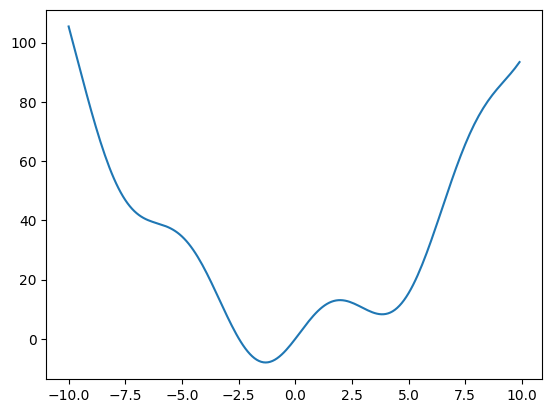

In [58]:
plt.plot(x, f(x))

In [61]:
from scipy import optimize

In [62]:
result = optimize.minimize(f, x0=0)

In [63]:
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -7.945823375615215
        x: [-1.306e+00]
      nit: 5
      jac: [-1.192e-06]
 hess_inv: [[ 8.589e-02]]
     nfev: 12
     njev: 6

In [64]:
result.x

array([-1.30644012])

In [65]:
optimize.minimize(f, x0=0, method="L-BFGS-B")

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -7.945823375615166
        x: [-1.306e+00]
      nit: 5
      jac: [-1.599e-06]
     nfev: 12
     njev: 6
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [66]:
res = optimize.minimize(f, x0=3, method="L-BFGS-B")

In [67]:
res.x

array([3.83746709])

In [68]:
optimize.basinhopping(f, 0)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -7.945823375615284
                          x: [-1.306e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 1014
                       njev: 507
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -7.945823375615284
                                    x: [-1.306e+00]
                                  nit: 3
                                  jac: [ 1.192e-07]
                             hess_inv: [[ 8.583e-02]]
                                 nfev: 10
                                 njev: 5

# Statistics

In [69]:
samples = np.random.normal(size=1000)

In [70]:
np.mean(samples)

0.019978884748733456

In [71]:
np.median(samples)

0.038996688833130885

In [72]:
np.std(samples)

0.9740082825721783

# Mean, Variance & Standard Deviation

Imagine you have a bunch of socks scattered around your room. You want to understand how spread out they are and where most of them tend to land. Three statistics can help you with this: mean, variance, and standard deviation.

**The Mean: The Balancing Point**

* The mean is like the **average** location of all your socks. If you balanced a giant cardboard cutout of all your socks on a fingertip, the mean would be the point where it would balance perfectly.
* It's calculated by adding up the distances of all the socks from a fixed point (like the center of your room) and then dividing by the total number of socks.

**Variance: How Spread Out Are the Socks?**

* Variance tells you how far, on average, your socks are from the mean. Imagine stretching a giant rubber band around the mean point. Variance tells you how much the rubber band needs to stretch to encompass most of your socks.
* It's calculated by finding the squared deviations of each sock from the mean (how far each sock is away), adding all those squared distances together, and then averaging them by dividing by the total number of socks (or sometimes the number of socks minus one, depending on the context). Squaring the deviations ensures larger distances are emphasized more.

**Standard Deviation: Unveiling the Spread**

* Standard deviation is like the **radius** of your imaginary rubber band around the mean. It tells you how far most of your socks are typically located from the average spot (the mean).
* It's calculated by taking the square root of the variance. This takes us back from the squared distances used in variance to a unit that reflects actual distance (like centimeters from the mean).

**Here's how these three work together:**

* A **high mean** with a **low variance** and **low standard deviation** suggests most of your socks are clustered around a single spot in the room (maybe you have a designated sock basket!).
* A **low mean** with a **high variance** and **high standard deviation** indicates your socks are scattered all over the place, far from each other and the average location.

**Remember:**

* Mean, variance, and standard deviation are all important for understanding how data is distributed.
* They are especially useful for comparing the spread of data from different sets (like sock distribution in your room vs. your friend's room).

By understanding these concepts, you can gain valuable insights into how data points cluster or disperse within a dataset.